# PROJETO 1 - CIENCIA DOS DADOS

Nome: Mariana Sophia Abrantes 

** Pergunta: Como o saneamento básico e a energia produzida influencia no IDH? **

___

##  IDH, saneamento básico e energia

Foram coletados três dados do site https://www.gapminder.org/:
1. Sanemanto Básico
2. Energia Produzida
3. IDH

No dataframe dados criado a seguir, o conteúdo de cada célula é a proporção da população que tem acesso a boas condições de saneamento básico em um determinado ano (coluna) para determinado país (linha).

No dataframe dados2 criado a seguir, o conteúdo de cada célula é a medida da Energia Produzida total de um determinado ano (coluna) para um determinado país (linha).

No dataframe dados3 criado a seguir, o conteúdo de cada célula é o IDH de um determinado ano (coluna) para um determinado país (linha).

Como os arquivos estão separados, será preciso juntá-los cruzando os paises.

Vamos nos restringir a analisar o ano de 2010.


# Imports 

In [136]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [137]:
import os
print(os.getcwd())

C:\Users\Mariana Abrantes\Documents\ciencia_dados\CD18\projeto1


# Leitura dos dados e fixação do ano 

# Saneamento Básico

In [145]:
dados = pd.read_excel('sanitation.xlsx')

In [146]:
dados = dados[['Proportion of the population using improved sanitation facilities, urban', 2009]]
dados = dados.rename(index = str, columns = {'Proportion of the population using improved sanitation facilities, urban': "Country Name", 2009 : 'Proportion of the population using improved sanitation facilities, urban'})
dados

,Country Name,"Proportion of the population using improved sanitation facilities, urban"
0,Abkhazia,NaN
1,Afghanistan,60.0
2,Akrotiri and Dhekelia,NaN
3,Albania,95.0
4,Algeria,98.0
5,American Samoa,NaN
6,Andorra,100.0
7,Angola,85.0
8,Anguilla,NaN
9,Antigua and Barbuda,98.0


# Energia 

In [147]:
dados2 = pd.read_excel("energy produce total.xlsx")

In [148]:
dados2 = dados2[['Energy production, total (toe)', '2009']]
dados2 = dados2.rename(index = str, columns = {'Energy production, total (toe)': "Country Name", '2009': 'Energy production'})
dados2

,Country Name,Energy production
0,Afghanistan,NaN
1,Albania,1253.804
2,Algeria,152291.931
3,American Samoa,NaN
4,Andorra,NaN
5,Angola,100957.649
6,Antigua and Barbuda,NaN
7,Argentina,80818.691
8,Armenia,824.933
9,Aruba,NaN


# HDI

In [149]:
dados3 = pd.read_excel("Indicator_HDI.xlsx")
dados3 = dados3[['HDI', 2009]]
dados3 = dados3.rename(index = str, columns = {'HDI': "Country Name", 2009: 'HDI'})
dados3

,Country Name,HDI
0,Abkhazia,NaN
1,Afghanistan,0.387
2,Akrotiri and Dhekelia,NaN
3,Albania,0.734
4,Algeria,0.691
5,American Samoa,NaN
6,Andorra,NaN
7,Angola,0.481
8,Anguilla,NaN
9,Antigua and Barbuda,NaN


# Junção das tabelas

In [150]:
df = dados.join(dados2, how='inner', lsuffix='.', rsuffix='.')
df

,Country Name.,"Proportion of the population using improved sanitation facilities, urban",Country Name.,Energy production
0,Abkhazia,NaN,Afghanistan,NaN
1,Afghanistan,60.0,Albania,1253.804
2,Akrotiri and Dhekelia,NaN,Algeria,152291.931
3,Albania,95.0,American Samoa,NaN
4,Algeria,98.0,Andorra,NaN
5,American Samoa,NaN,Angola,100957.649
6,Andorra,100.0,Antigua and Barbuda,NaN
7,Angola,85.0,Argentina,80818.691
8,Anguilla,NaN,Armenia,824.933
9,Antigua and Barbuda,98.0,Aruba,NaN


In [151]:
data = df.join(dados3, how="inner")
data

,Country Name.,"Proportion of the population using improved sanitation facilities, urban",Country Name.,Energy production,Country Name,HDI
0,Abkhazia,NaN,Afghanistan,NaN,Abkhazia,NaN
1,Afghanistan,60.0,Albania,1253.804,Afghanistan,0.387
2,Akrotiri and Dhekelia,NaN,Algeria,152291.931,Akrotiri and Dhekelia,NaN
3,Albania,95.0,American Samoa,NaN,Albania,0.734
4,Algeria,98.0,Andorra,NaN,Algeria,0.691
5,American Samoa,NaN,Angola,100957.649,American Samoa,NaN
6,Andorra,100.0,Antigua and Barbuda,NaN,Andorra,NaN
7,Angola,85.0,Argentina,80818.691,Angola,0.481
8,Anguilla,NaN,Armenia,824.933,Anguilla,NaN
9,Antigua and Barbuda,98.0,Aruba,NaN,Antigua and Barbuda,NaN


# Plotando gráficos

Gráfico do proporção da população que tem acesso a boas condições de saneamento básico pela energia produzida total.

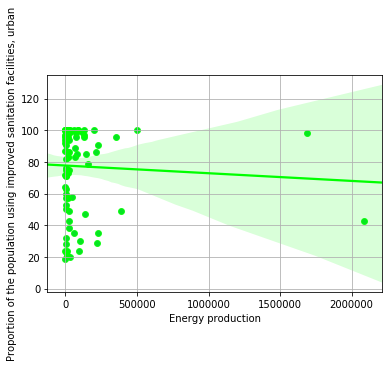

In [152]:
df.plot.scatter(y='Proportion of the population using improved sanitation facilities, urban', x ='Energy production')
sns.regplot(df["Energy production"],df["Proportion of the population using improved sanitation facilities, urban"], color=('lime'))
plt.grid()

Gráfico do IDH com energia produzida.

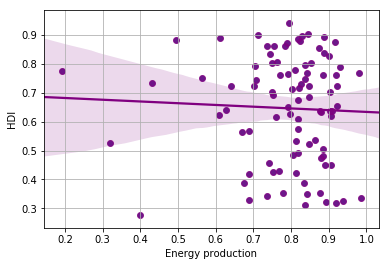

In [118]:
data.plot.scatter(y ='HDI', x= 'Energy production' )
sns.regplot(data["Energy production"],data["HDI"], color=('purple'))
plt.grid()

Gráfico do IDH por proporção da população que tem acesso a boas condições de saneamento básico.

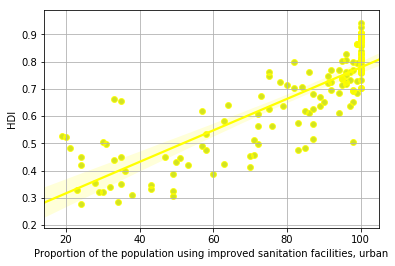

In [129]:
data.plot.scatter(y ='HDI', x= 'Proportion of the population using improved sanitation facilities, urban' )
sns.regplot(data['Proportion of the population using improved sanitation facilities, urban'],data["HDI"], color=('yellow'))
plt.grid()

Gráfico em box do IDH

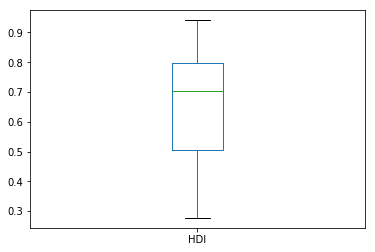

In [153]:
data.loc[:, "HDI"].plot.box()

Gráfico de box saneamento.

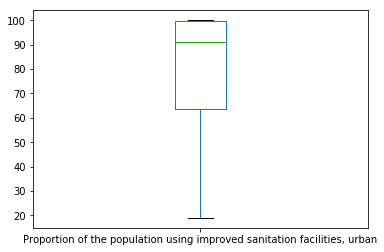

In [154]:
data.loc[:, "Proportion of the population using improved sanitation facilities, urban"].plot.box()

Gráfico em box 

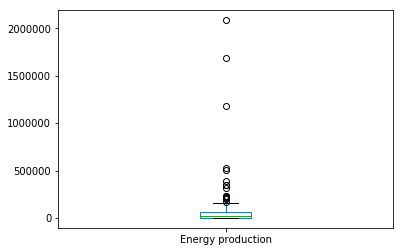

In [155]:
data.loc[:, "Energy production"].plot.box()

# Histograma do proporção da população que tem acesso a boas condições de saneamento básico

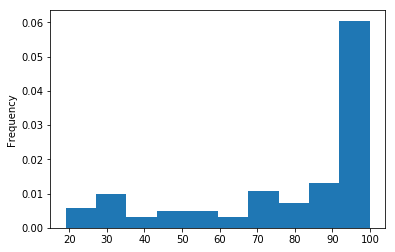

In [157]:
data["Proportion of the population using improved sanitation facilities, urban"].plot.hist(density=True)

# Histograma da Energia Total Produzida

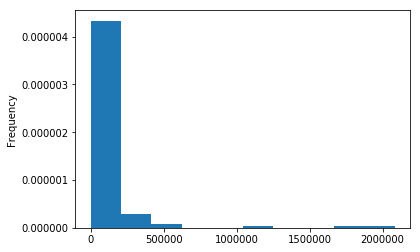

In [158]:
data["Energy production"].plot.hist(density=True)

# Histograma do IDH

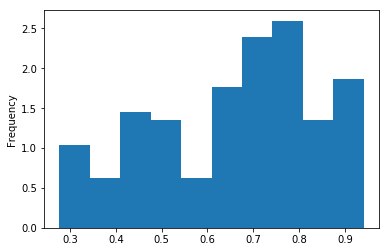

In [159]:
data["HDI"].plot.hist(density=True)

# Conclusão

A partir das análises feitas acima, é possivel observar que os dados de sanemamento basico e energia produzida por cada país não são os unicos dados que interferem no IDH de cada país. 

In [117]:
writer = pd.ExcelWriter('Projeto1_mariana.abrantes.xlsx')
data.to_excel(writer, 'data')
writer.save()